In [2]:
#importing all the required libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [3]:
#importing the csv file into notebook using pandas.

bball=pd.read_csv('baseballstudy.csv')

In [4]:
bball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [5]:
bball.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [6]:
#Knowing all the datatypes of the dataset

bball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
W      30 non-null int64
R      30 non-null int64
AB     30 non-null int64
H      30 non-null int64
2B     30 non-null int64
3B     30 non-null int64
HR     30 non-null int64
BB     30 non-null int64
SO     30 non-null int64
SB     30 non-null int64
RA     30 non-null int64
ER     30 non-null int64
ERA    30 non-null float64
CG     30 non-null int64
SHO    30 non-null int64
SV     30 non-null int64
E      30 non-null int64
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [7]:
bball.shape

(30, 17)

In [8]:
#Checking for null values

bball.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

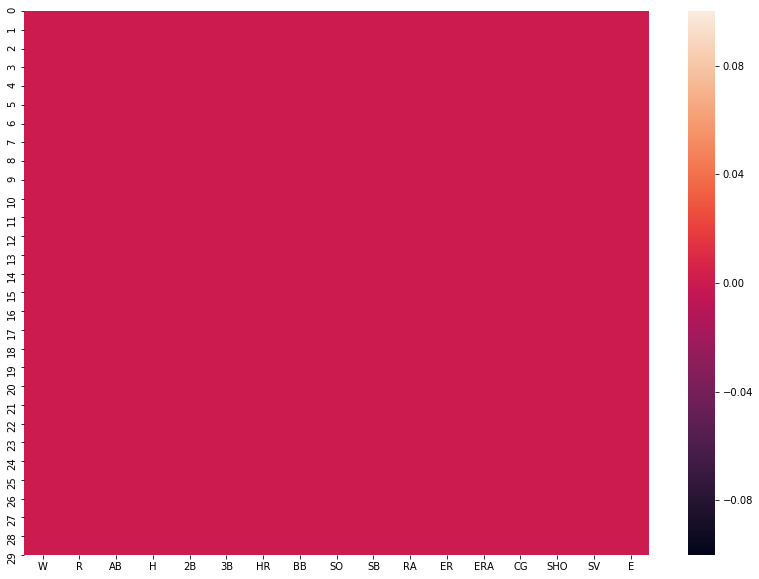

In [9]:
#Visualizing the null value with the help of seaborn


plt.figure(figsize=(14,10))
sbn.heatmap(bball.isnull())
plt.show()

In [10]:
bball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [11]:
bball.min()

W        63.00
R       573.00
AB     5385.00
H      1324.00
2B      236.00
3B       13.00
HR      100.00
BB      375.00
SO      973.00
SB       44.00
RA      525.00
ER      478.00
ERA       2.94
CG        0.00
SHO       4.00
SV       28.00
E        75.00
dtype: float64

In [12]:
bball.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [13]:
bball.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


In [14]:
bball['W'].mode()

0    68
dtype: int64

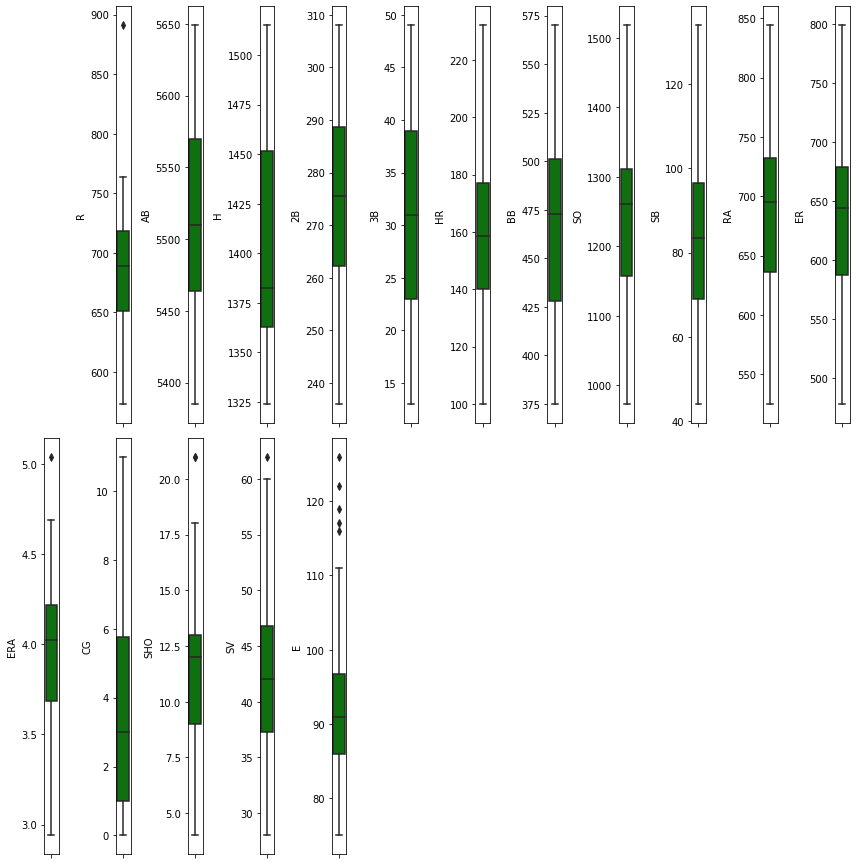

In [17]:
#Looking for outliers

import warnings
warnings.filterwarnings('ignore')

collist=bball.columns.values
nrows=10
ncols=12
plt.figure(figsize=(ncols,5*ncols))

for i in range(1,len(collist)):
    plt.subplot(nrows,ncols,i+1)
    sbn.boxplot(bball[collist[i]],color='green',orient='v')
    plt.tight_layout()


In [18]:
bball.shape

(30, 17)

In [19]:
# Removing Outliers

from scipy.stats import zscore
z_sc=np.abs(zscore(bball))
z_sc

array([[1.36540860e+00, 6.19077968e-01, 8.47731264e-01, 1.66368512e+00,
        1.42017307e+00, 1.04119304e+00, 7.87298598e-01, 1.53490242e+00,
        2.69762957e+00, 9.13883291e-01, 6.66233927e-01, 5.05110079e-01,
        5.06955186e-01, 5.39806195e-01, 8.14628593e-01, 1.67160651e+00,
        4.61469635e-01],
       [1.97838300e-01, 1.34431656e-01, 7.11093535e-01, 9.70680764e-01,
        1.27403389e-01, 1.23580856e+00, 2.43966683e-01, 5.36591904e-01,
        1.54878442e-01, 6.01825582e-01, 1.65970766e-01, 2.48929848e-01,
        2.54597523e-01, 5.39806195e-01, 1.72800005e-01, 2.49879323e-01,
        6.07196888e-01],
       [3.24325082e-03, 3.32905860e-01, 1.11523330e+00, 1.51891367e-01,
        1.58879521e+00, 2.23807850e-01, 7.23377196e-01, 1.13914361e+00,
        8.93981893e-01, 1.11449182e-01, 6.80339091e-01, 7.51623132e-01,
        6.41346840e-01, 2.77264091e+00, 3.20914294e-01, 6.54856158e-01,
        1.11724227e+00],
       [4.83244373e-01, 1.14641931e+00, 2.41521620e-01, 4.010

In [20]:
threshold=3

ndata=bball[(z_sc<3).all(axis=1)]
ndata

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [21]:
bball.shape

(30, 17)

In [22]:
ndata.shape

(29, 17)

In [23]:
#Checking for skewness

ndata.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

In [24]:
#Treating skewness of the data

for col in ndata.columns:
    if ndata.skew().loc[col]>0.55:
        ndata[col]=np.log1p(ndata[col])

In [25]:
#Checking again for skewness

ndata.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [26]:
ndata.corr()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.390451,-0.085780,-0.020785,0.384886,-0.206737,0.245697,0.447513,0.156469,-0.169503,-0.823176,-0.815308,-0.826952,0.000122,0.497526,0.756909,-0.075008
R,0.390451,1.000000,0.438022,0.432236,0.469293,0.134204,0.586894,0.258450,0.081158,0.075323,-0.013858,0.007727,-0.009122,0.164021,-0.085108,0.080162,0.041193
AB,-0.085780,0.438022,1.000000,0.770154,0.490752,0.445604,-0.064653,-0.137850,-0.111243,0.373674,0.315499,0.309146,0.254872,-0.056349,-0.198872,-0.142034,0.321833
H,-0.020785,0.432236,0.770154,1.000000,0.527354,0.579735,-0.219201,-0.221773,-0.373301,0.420199,0.243639,0.279956,0.255886,0.062589,-0.138087,-0.099684,-0.012775
2B,0.384886,0.469293,0.490752,0.527354,1.000000,0.342419,-0.098695,0.211243,-0.096772,0.194308,-0.215196,-0.224993,-0.248212,0.226900,0.084060,0.246600,0.146978
3B,-0.206737,0.134204,0.445604,0.579735,0.342419,1.000000,-0.369299,-0.404852,-0.196586,0.483818,0.312750,0.333731,0.325883,-0.002910,-0.058896,-0.259901,0.098532
HR,0.245697,0.586894,-0.064653,-0.219201,-0.098695,-0.369299,1.000000,0.336814,0.479914,-0.166072,-0.092586,-0.062094,-0.070756,0.126024,0.005546,0.100228,-0.182374
BB,0.447513,0.258450,-0.137850,-0.221773,0.211243,-0.404852,0.336814,1.000000,0.315566,-0.117622,-0.425381,-0.455832,-0.465794,0.448140,0.473922,0.205211,-0.052376
SO,0.156469,0.081158,-0.111243,-0.373301,-0.096772,-0.196586,0.479914,0.315566,1.000000,0.038188,-0.140570,-0.177655,-0.195362,-0.068395,0.231230,0.119732,0.152594
SB,-0.169503,0.075323,0.373674,0.420199,0.194308,0.483818,-0.166072,-0.117622,0.038188,1.000000,0.134315,0.146243,0.128848,-0.042099,-0.104602,-0.193739,0.078008


In [27]:
ndata.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,7.311886,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,83,696,5467,7.207860,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,81,669,5439,7.241366,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027
3,76,622,5533,7.231287,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586,4.624973
4,74,689,5605,7.323831,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519,4.465908


In [28]:
#Here H,E columns are showing very less co-relation with the target variable(w) hence, removing them.

fdata=ndata.drop(['H','E'],axis=1)
fdata.head()

,W,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
0,95,724,5575,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051
1,83,696,5467,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641
2,81,669,5439,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562
3,76,622,5533,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586
4,74,689,5605,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519


In [29]:
fdata.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
dtype: float64

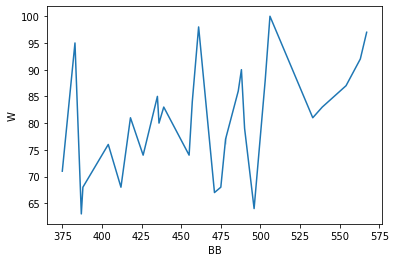

In [30]:
# Data visualization


sbn.lineplot('BB','W',data=fdata)
plt.show()

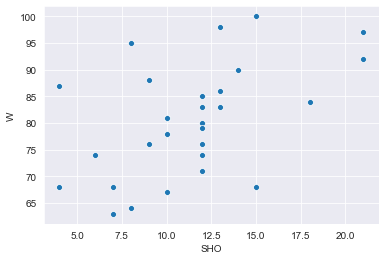

In [31]:
sbn.set_style(style='darkgrid')
sbn.scatterplot('SHO','W',data=fdata)
plt.show()

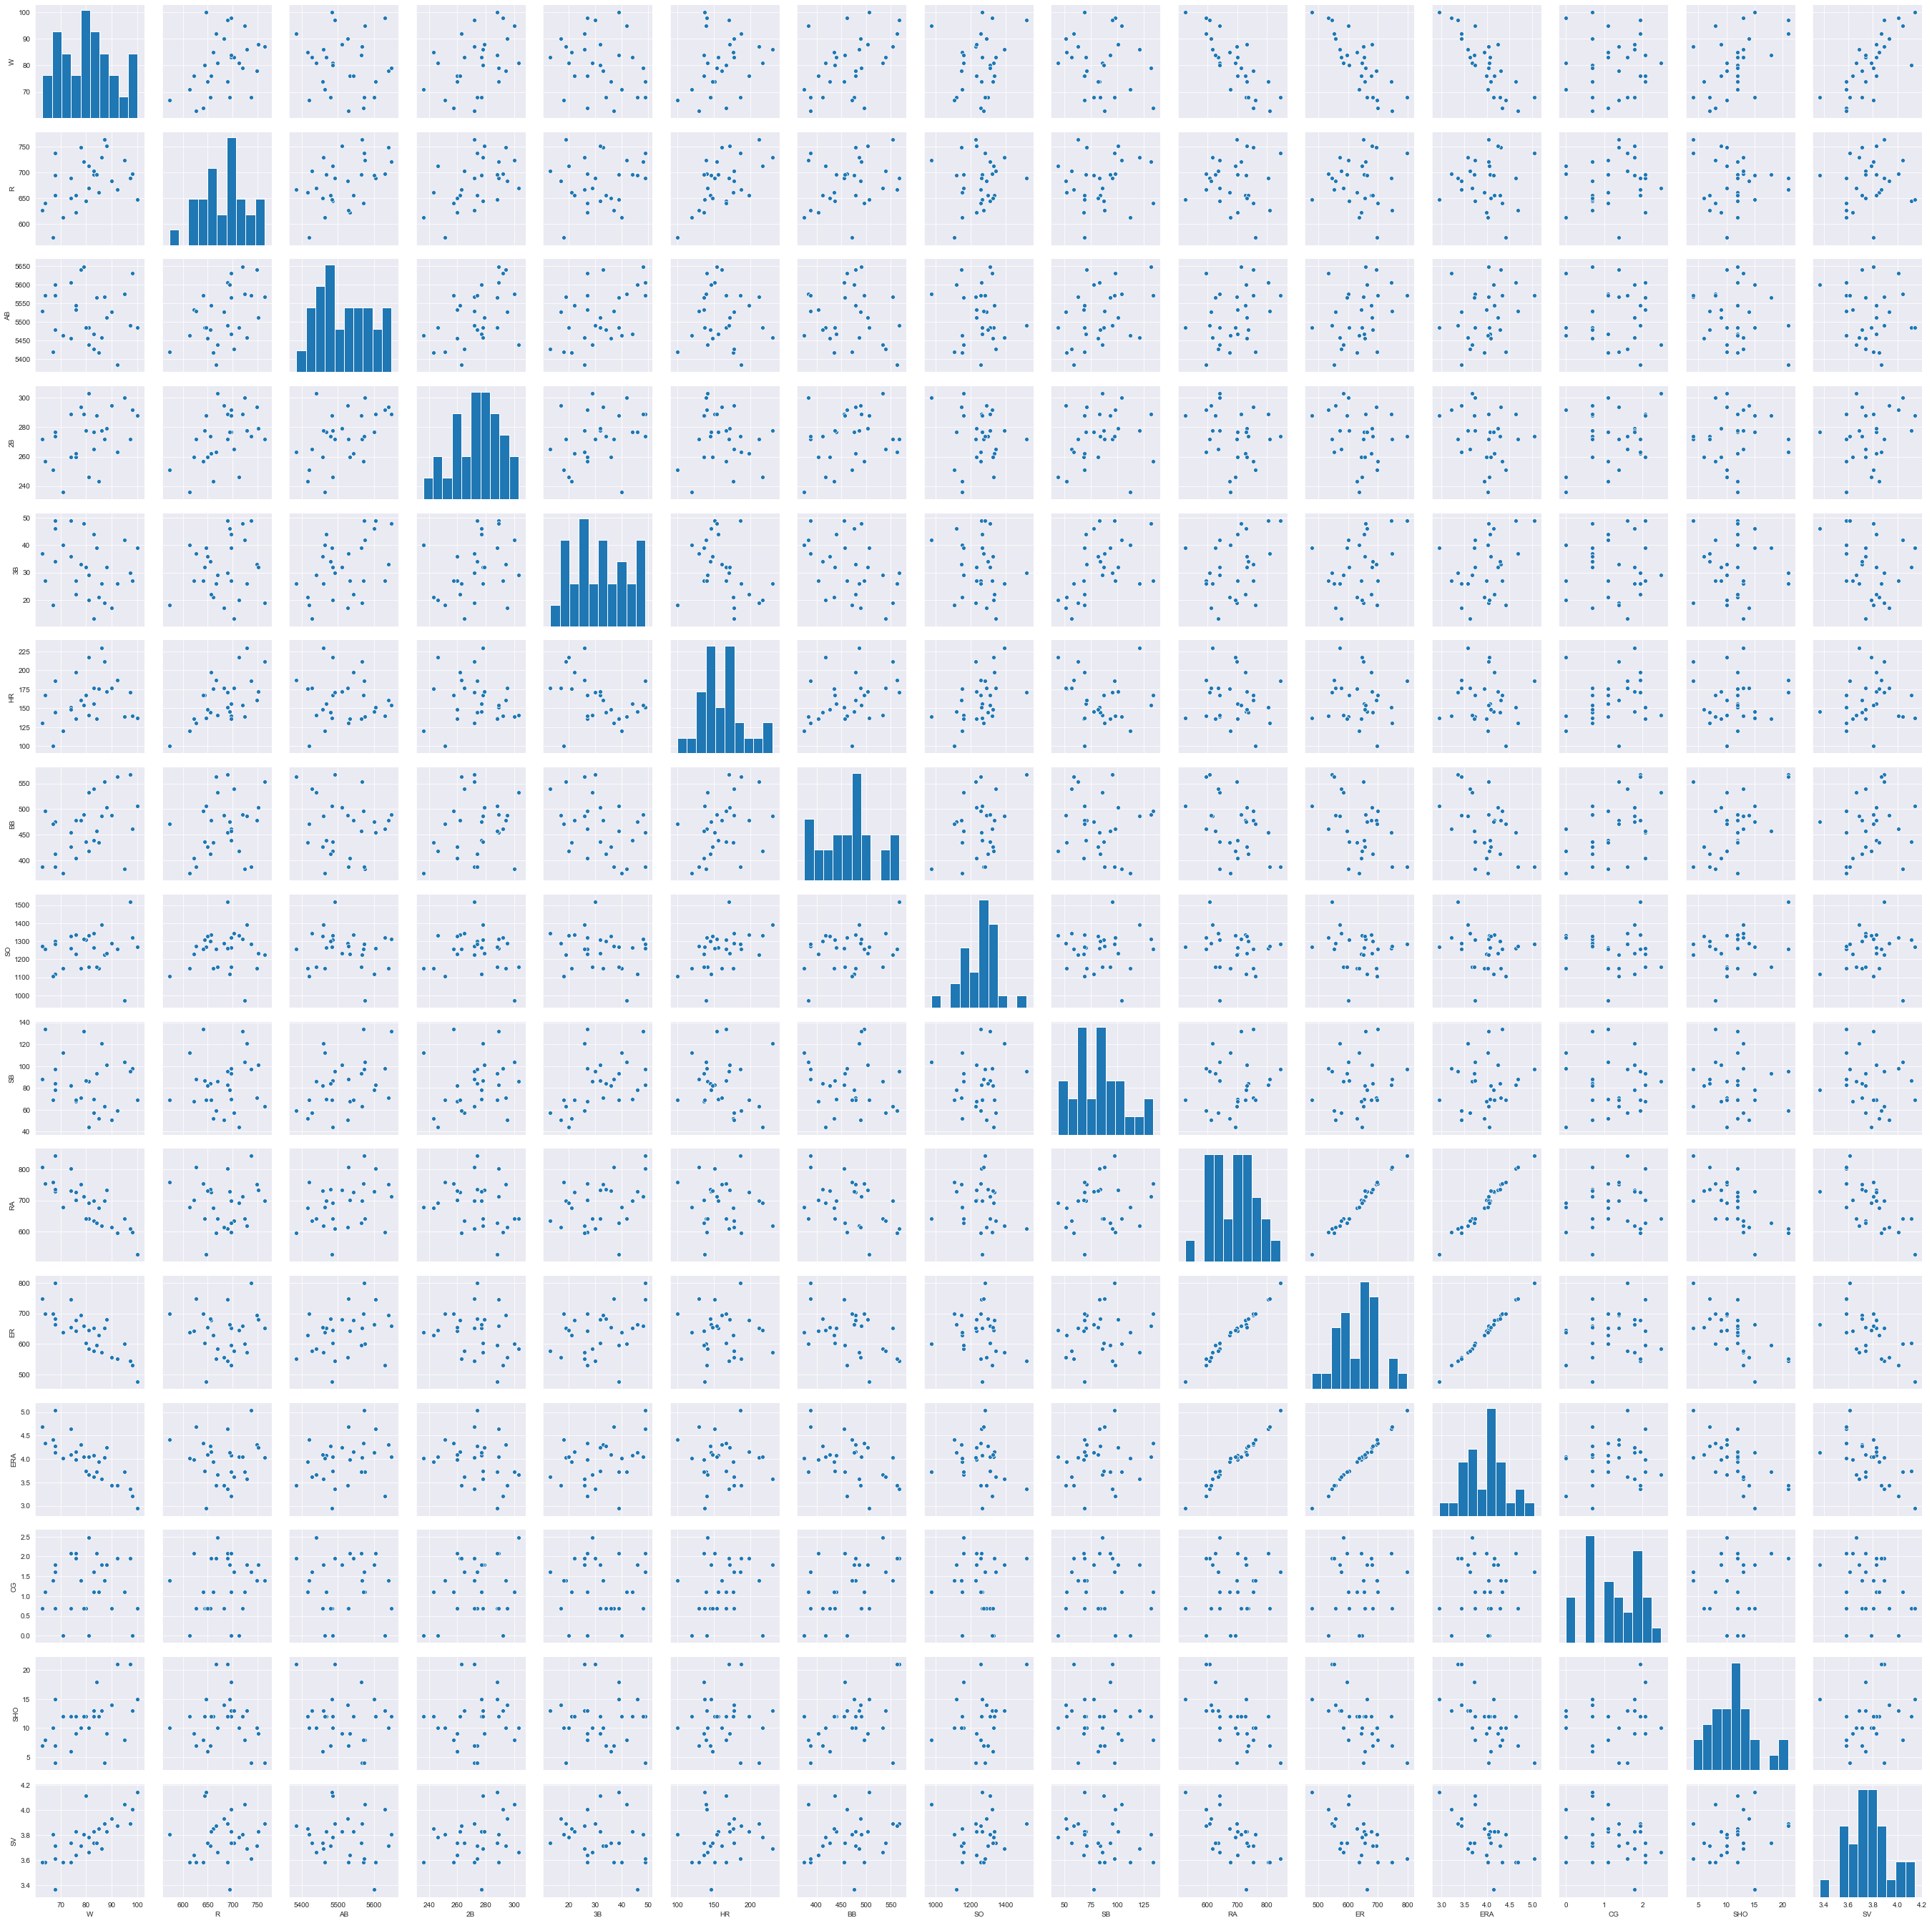

In [32]:
sbn.pairplot(fdata)

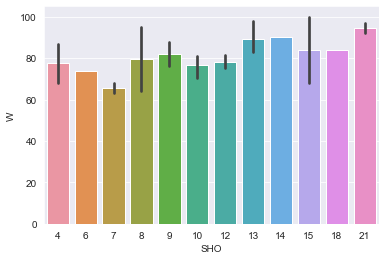

In [33]:
sbn.barplot('SHO','W',data=fdata)
plt.show()

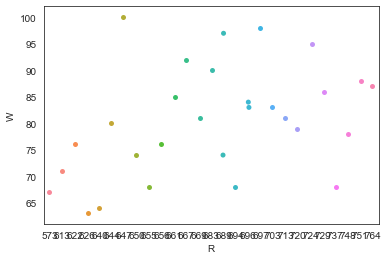

In [34]:
sbn.set_style(style='white')
sbn.stripplot('R','W',data=fdata)

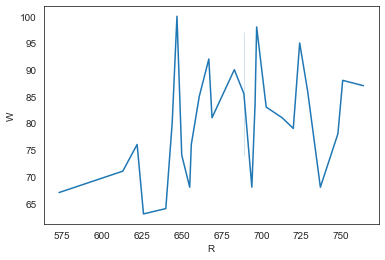

In [35]:
sbn.lineplot('R','W',data=fdata)

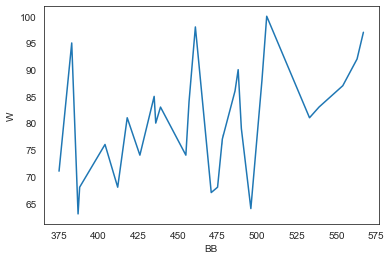

In [36]:
sbn.lineplot('BB','W',data=fdata)

In [ ]:
sbn.lineplot('SV','W',data=fdata)
plt.show()

In [39]:
#Seperating the features and label variables


x=fdata.drop('W',axis=1)

In [40]:
x.head()

,R,AB,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV
0,724,5575,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051
1,696,5467,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641
2,669,5439,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562
3,622,5533,260,27,136,404,1231,68,701,643,3.98,2.079442,9,3.637586
4,689,5605,289,49,151,455,1259,83,803,746,4.64,2.079442,12,3.583519


In [41]:
y=pd.DataFrame(columns=['W'],data=fdata)

In [42]:
y.head()

,W
0,95
1,83
2,81
3,76
4,74


In [43]:
x.shape

(29, 14)

In [44]:
y.shape

(29, 1)

In [45]:
y

,W
0,95
1,83
2,81
3,76
4,74
6,87
7,81
8,80
9,78
10,88


In [46]:
#Seperating training and testing data through train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)

In [47]:
#fitting the model


lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
lr.score(x_train,y_train)

0.9728286825520331

In [50]:
predy=lr.predict(x_test)
print('r2 score for the predictions is',r2_score(y_test,predy))
print('Mean Absolute Error is:',mean_absolute_error(y_test,predy))
print('Root mean squared error is:',np.sqrt(mean_squared_error(y_test,predy)))

r2 score for the predictions is 0.5483923055076401
Mean Absolute Error is: 3.693721497432388
Root mean squared error is: 4.716841243503912


In [93]:
#Cross validation

cvs=cross_val_score(lr,x_train,y_train,cv=5,scoring='r2')
print(cvs)
print(cvs.mean())
print(cvs.std())

[ 0.433005   -1.61136267  0.45810612  0.23338633  0.32937602]
-0.03149783825400694
0.7939573499149165


In [52]:
#Selecting the random state

def max_r2_score(model,x,y):
    f_r2_score=0
    for rst in range(42,100):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=rst)
        model.fit(x_train,y_train)
        predm=model.predict(x_test)
        r2s=r2_score(y_test,predm)
        print('r2 score is',r2s,'for the random state',rst)
    
        if r2s>f_r2_score:
            f_r2_score=r2s
    print('max r2 score for the corresponding random state is ',f_r2_score,rst)
    return rst

In [53]:
max_r2_score(lr,x,y)

r2 score is 0.8091197962009867 for the random state 42
r2 score is 0.5483923055076401 for the random state 43
r2 score is 0.4596799911011479 for the random state 44
r2 score is 0.612666625555945 for the random state 45
r2 score is 0.6451098284434497 for the random state 46
r2 score is 0.4087206376821855 for the random state 47
r2 score is -0.10063999908285814 for the random state 48
r2 score is -0.21259187887361608 for the random state 49
r2 score is 0.8578244649892357 for the random state 50
r2 score is 0.7361093284084888 for the random state 51
r2 score is -0.011343587875676908 for the random state 52
r2 score is 0.6334171248649416 for the random state 53
r2 score is 0.4999835312691646 for the random state 54
r2 score is 0.25310498878659615 for the random state 55
r2 score is 0.8600907074423434 for the random state 56
r2 score is 0.9033877037516436 for the random state 57
r2 score is 0.8002520042069312 for the random state 58
r2 score is 0.836010007375008 for the random state 59
r2 s

99

In [92]:
# boosting regression model

from sklearn.ensemble import AdaBoostRegressor

adb=AdaBoostRegressor(n_estimators=10)
adb.fit(x_train,y_train)
adbp=adb.predict(x_test)
print('mean r2 score for adaboost regressor is:',cross_val_score(adb,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for adaboost regressor is: 0.47846014733119546


In [55]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

model=GradientBoostingRegressor()
model.fit(x_train,y_train)
predm=model.predict(x_test)
print('mean r2 score for gradient boosting regressor is',cross_val_score(model,x_train,y_train,cv=5,scoring='r2').mean())

mean r2 score for gradient boosting regressor is 0.6883641933681552


In [56]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(random_state=45,params=parametes)
rf.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 'warn',
 'n_jobs': None,
 'oob_score': False,
 'random_state': 45,
 'verbose': 0,
 'warm_start': False}

In [70]:
parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [8, 12],
    'n_estimators': [100, 300, 500]
}
gd=GridSearchCV(estimator=rf,param_grid=parameters,cv=5)
gd.fit(x_train,y_train)
gd.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [85]:
from sklearn.model_selection import GridSearchCV
rf=RandomForestRegressor(n_estimators=100,bootstrap=True,
 max_depth=80,
 max_features=3,
 min_samples_leaf=3,
 min_samples_split=8)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=80,
                      max_features=3, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=3, min_samples_split=8,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [88]:
rfpre=rf.predict(x_test)
print('r2 score of rf:',r2_score(y_test,rfpre))

r2 score of rf: 0.4578904369283734


In [64]:
from sklearn.linear_model import LassoCV

In [104]:
lsr=LassoCV()
lsr.fit(x_train,y_train)
lscp=lsr.predict(x_test)
print('r2 score for the predictions is',r2_score(y_test,lscp))
print('Mean Absolute Error is:',mean_absolute_error(y_test,lscp))
print('Root mean squared error is:',np.sqrt(mean_squared_error(y_test,lscp)))
print('coeff',lr.coef_)
print('intercept:',lr.intercept_)

r2 score for the predictions is 0.6735001326385015
Mean Absolute Error is: 6.141006425364056
Root mean squared error is: 6.6556269246087085
coeff [[ 1.46410424e-01 -2.02330657e-02 -1.11049302e-01 -8.79907712e-03
  -7.76845360e-02 -2.66029254e-02 -6.69306784e-05 -2.32956827e-02
   5.39276183e-02  1.70455369e-01 -4.88289681e+01  3.10173813e+00
   1.69749054e-01  2.51397555e+01]]
intercept: [96.93784991]


In [102]:
from sklearn.linear_model import RidgeCV,LassoCV

In [101]:
rdg=RidgeCV()
rdg.fit(x_train,y_train)
rdgp=rdg.predict(x_test)
print('r2 score for the predictions is',r2_score(y_test,rdgp))
print('Mean Absolute Error is:',mean_absolute_error(y_test,rdgp))
print('Root mean squared error is:',np.sqrt(mean_squared_error(y_test,rdgp)))
print('coeff',lr.coef_)
print('intercept:',lr.intercept_)


r2 score for the predictions is 0.8989815617674737
Mean Absolute Error is: 3.291049040150895
Root mean squared error is: 3.702096971601297
coeff [[ 1.46410424e-01 -2.02330657e-02 -1.11049302e-01 -8.79907712e-03
  -7.76845360e-02 -2.66029254e-02 -6.69306784e-05 -2.32956827e-02
   5.39276183e-02  1.70455369e-01 -4.88289681e+01  3.10173813e+00
   1.69749054e-01  2.51397555e+01]]
intercept: [96.93784991]


In [98]:
#Fitting the best model


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=99)
lr=LinearRegression()
lr.fit(x_train,y_train)

predy=lr.predict(x_test)
print('r2 score for the predictions is',r2_score(y_test,predy))
print('Mean Absolute Error is:',mean_absolute_error(y_test,predy))
print('Root mean squared error is:',np.sqrt(mean_squared_error(y_test,predy)))
print('coeff',lr.coef_)
print('intercept:',lr.intercept_)

r2 score for the predictions is 0.9497396828885903
Mean Absolute Error is: 2.115474244925686
Root mean squared error is: 2.61131989519356
coeff [[ 1.46410424e-01 -2.02330657e-02 -1.11049302e-01 -8.79907712e-03
  -7.76845360e-02 -2.66029254e-02 -6.69306784e-05 -2.32956827e-02
   5.39276183e-02  1.70455369e-01 -4.88289681e+01  3.10173813e+00
   1.69749054e-01  2.51397555e+01]]
intercept: [96.93784991]


In [105]:
print(predy)


[[67.47918727]
 [59.37921551]
 [94.79401549]
 [77.47294585]
 [87.98870938]
 [90.5392841 ]
 [85.42000767]]


In [108]:
#Saving the predictions into csv file

predy=pd.DataFrame(predy,columns=['Wins'])
predy.to_csv('Bballwinpredict.csv',index=False)

In [107]:
#Saving the model

import pickle

pickle_file='bball.pkl'
with open (pickle_file,'wb') as file:
    pickle.dump(lr,file)